In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
file_era5 = '/home/dgray24/ea_moda_fc_mtpr.nc'
ds_era5 = xr.open_dataset(file_era5)
ds_era5

<xarray.Dataset>
Dimensions:    (longitude: 1280, latitude: 523, time: 504)
Coordinates:
  * longitude  (longitude) float32 -168.8 -168.5 -168.2 ... 190.4 190.7 191.0
  * latitude   (latitude) float32 87.26 86.98 86.7 ... -58.88 -59.16 -59.44
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    mtpr       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [3]:
ds_era5_year=ds_era5.groupby('time.year').mean()
ds_era5_year

<xarray.Dataset>
Dimensions:    (longitude: 1280, latitude: 523, year: 42)
Coordinates:
  * longitude  (longitude) float32 -168.8 -168.5 -168.2 ... 190.4 190.7 191.0
  * latitude   (latitude) float32 87.26 86.98 86.7 ... -58.88 -59.16 -59.44
  * year       (year) int64 1979 1980 1981 1982 1983 ... 2017 2018 2019 2020
Data variables:
    mtpr       (year, latitude, longitude) float32 6.73e-06 ... 3.484e-05

ValueError: The coordinate must be equally spaced.

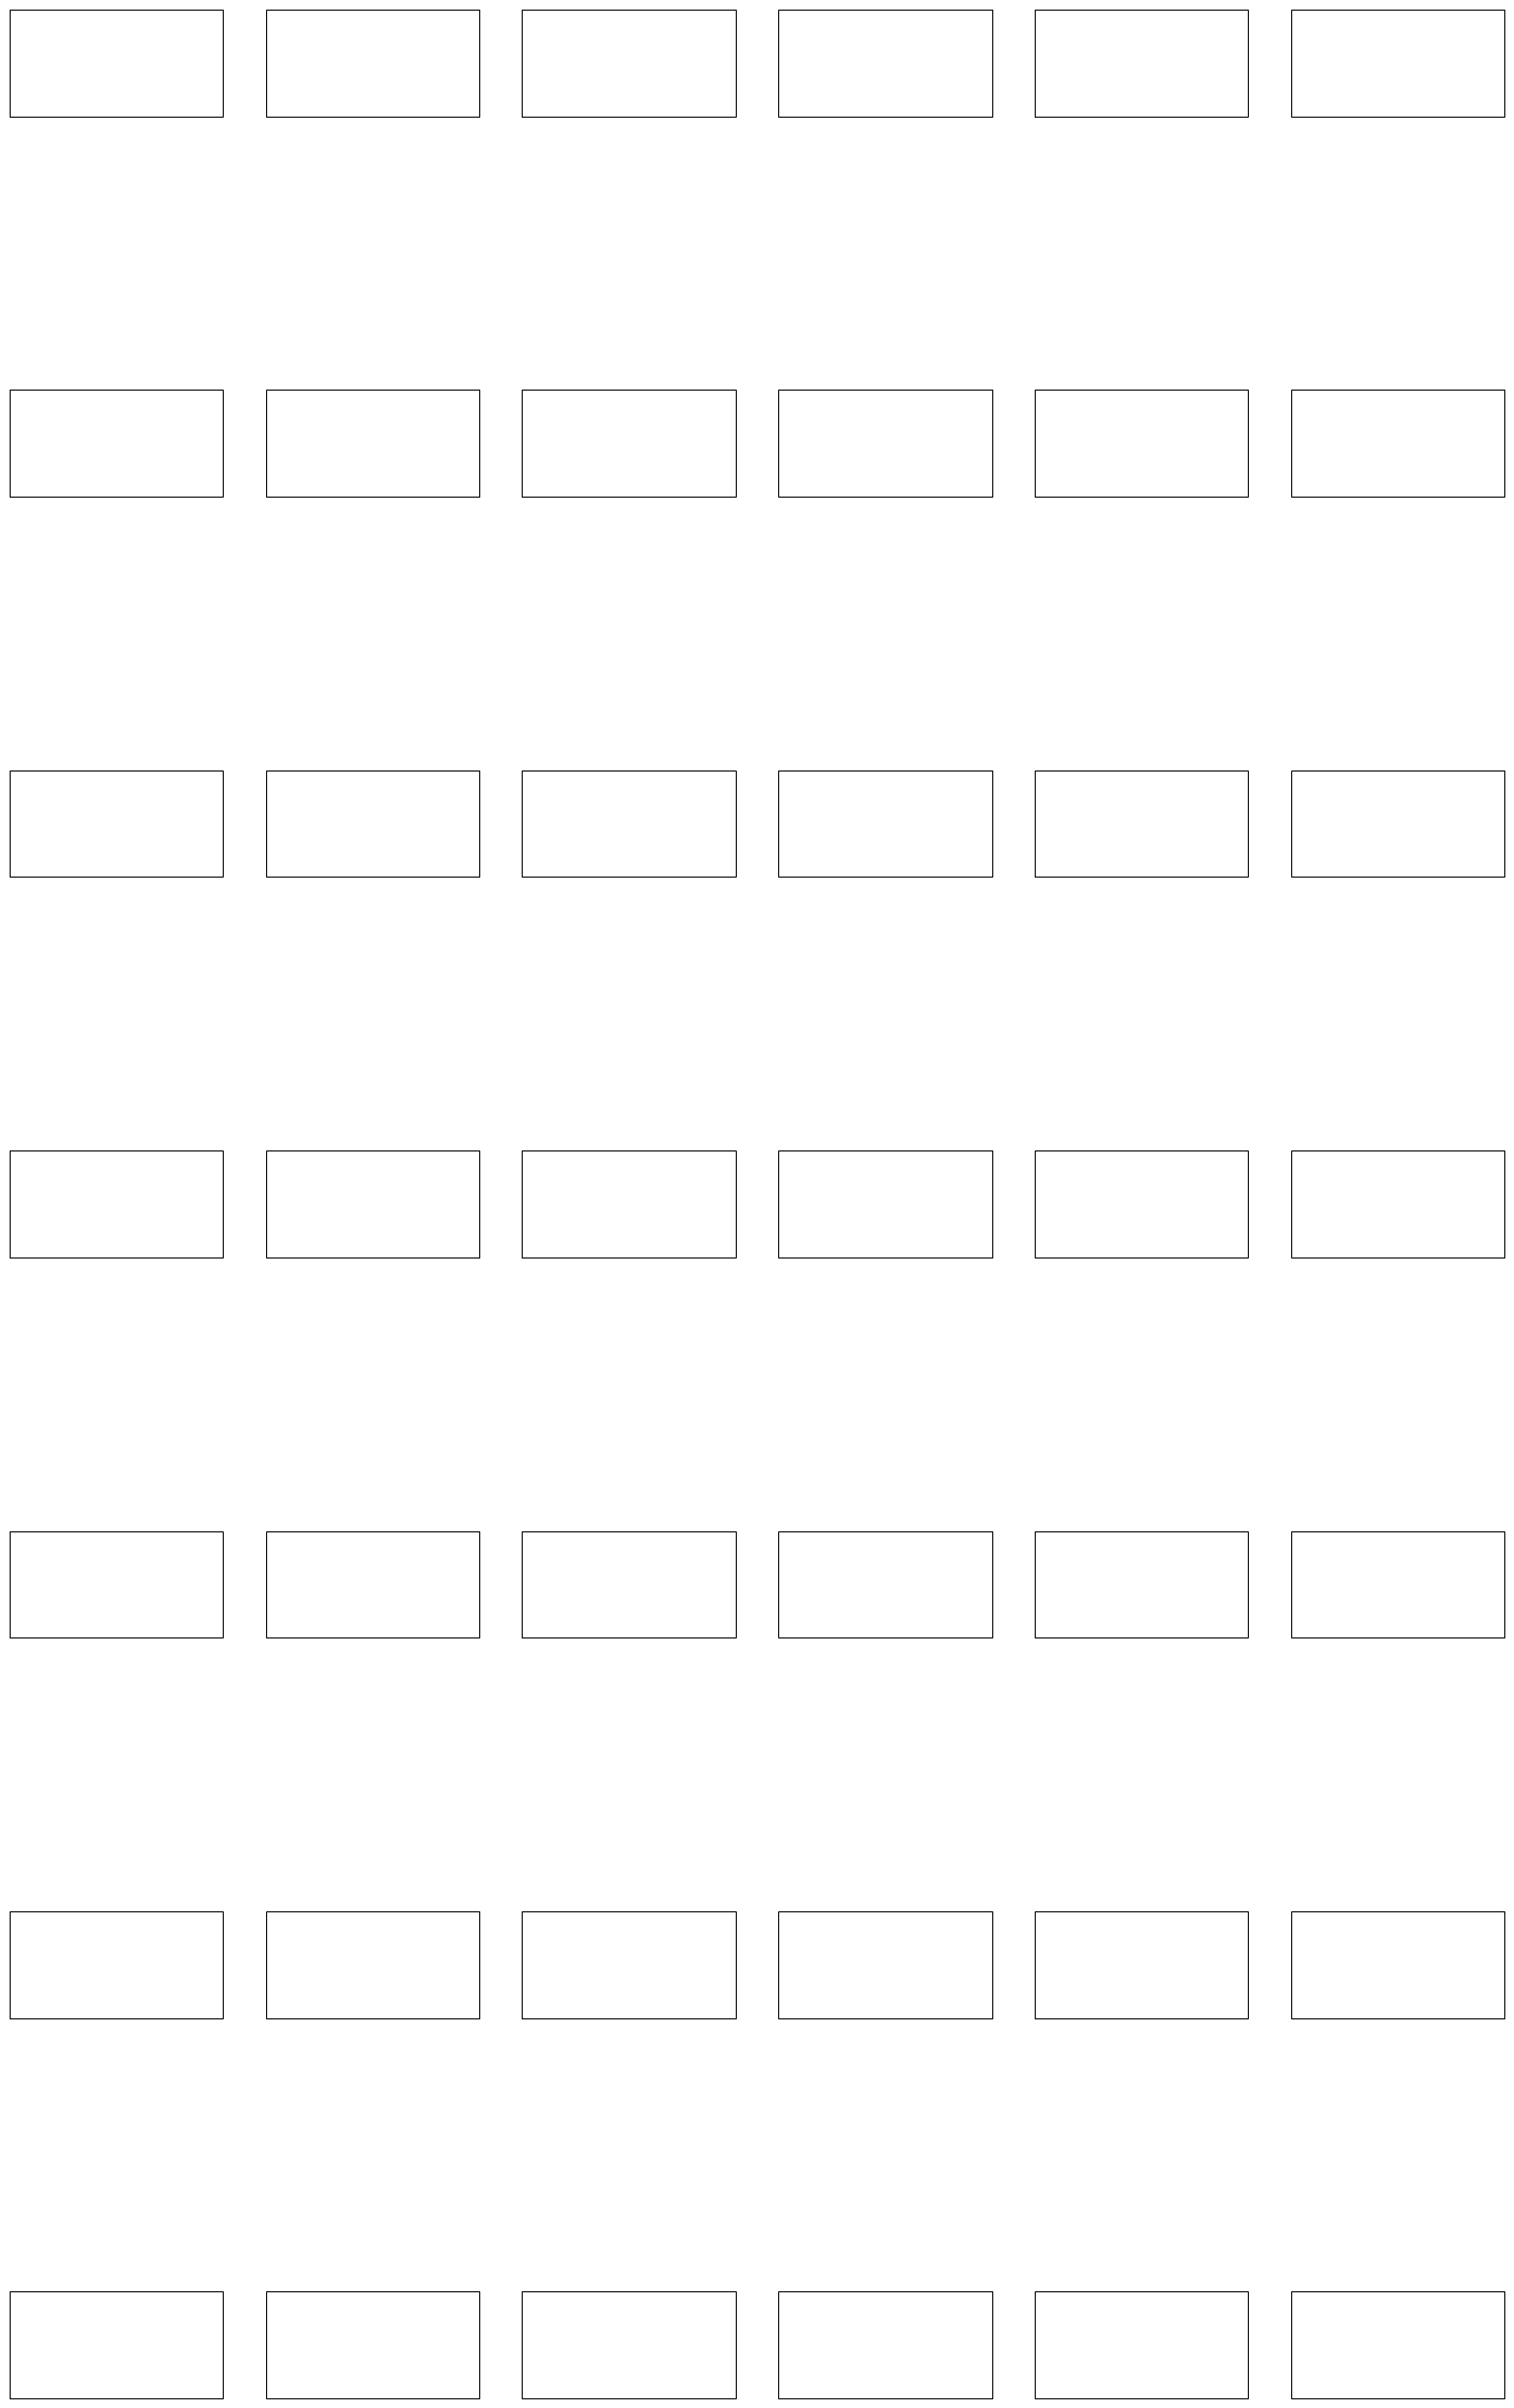

In [7]:
fig, axs = plt.subplots(nrows=7,ncols=6,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20,35))
clevs=np.arange(-5,36,5)
axs=axs.flatten()
for i,yr in enumerate(ds_era5_year['year']):
    data=ds_era5_year['mtpr'].sel(year=yr)
    data,lons=add_cyclic_point(data,coord=ds_era5_year['longitude'])
    cs=axs[i].contourf(lons,ds_era5_year['latitude'],data,clevs,
                      transform = ccrs.PlateCarree(),
                      cmap='coolwarm',extend='max',levels=[0,0.5,1,2,4,8,16])
    axs[i].set_title(yr.values, fontsize=18)
    axs[i].coastlines()
    axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)
    axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.5)
fig.tight_layout()
cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='kg $m^{-2}$ $s^{-1}$', shrink=0.6)
plt.suptitle('ERA5 Average Yearly Rate of Precipitation (1979-2020)', fontsize=30)